<a href="https://colab.research.google.com/github/Mescolin/8_queen_problem/blob/main/CEVO2_T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The 8-queens problem

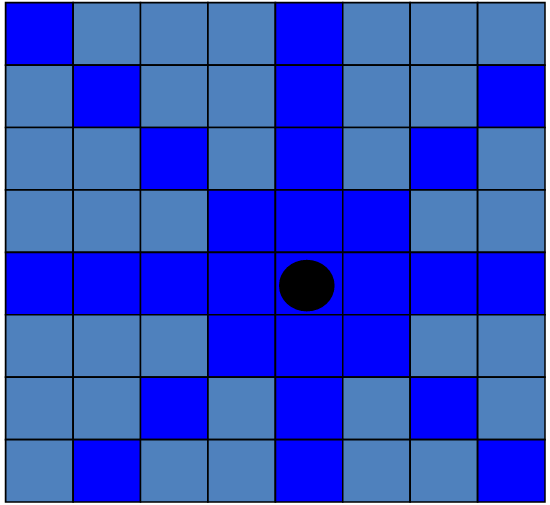

In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt

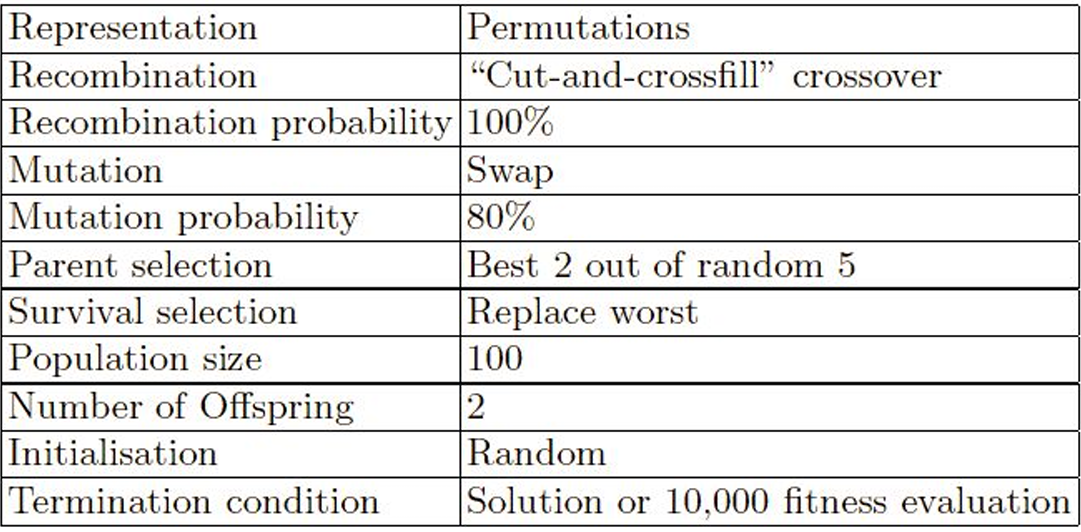

In [11]:
from inspect import indentsize
class eightQueens:
  def __init__(self, population_size = 100, mutation_probability = 0.8):
    self.population_size = population_size
    self.mutation_probability = mutation_probability
    self.population = []
    self.fitness_history = []
    self.best_solution = None
    self.best_fitness_history = []


  def init_pop(self):
    self.population = []
    for i in range (self.population_size):
      individual = list(range(1,9))
      random.shuffle(individual)
      self.population.append(individual)

  def calculate_penalty(self, individual):
    penalty = 0
    n = len(individual)

    for i in range(n):
      for j in range(i+1, n):
        #rainha na mesma linha
        #rainha na diagona
        if abs(individual[i] - individual[j]) == abs(i - j):
          penalty += 1

    return penalty

  def calculate_fitness (self, individual):
    penalty = self.calculate_penalty(individual)
    return 1 / (1 + penalty)

  def select_parents(self):
    # 2b from 5r
    random_selection = random.sample(self.population, 5)
    random_selection.sort(key=lambda x: self.calculate_fitness(x), reverse=True)
    return random_selection[0], random_selection[1] #acho que posso fazer random_selection[:2]

  def crossover(self, parent1, parent2):
    n = len(parent1)
    crossover_point = random.randint(1, n-1)

    child1 = parent1[:crossover_point]
    for value in parent2:
      if value not in child1:
        child1.append(value)

    child2 = parent2[:crossover_point]
    for value in parent1:
      if value not in child2:
        child2.append(value)

    return child1, child2

  def mutate(self, individual):
    if random.random() < self.mutation_probability:
      pos1, pos2 = random.sample(range(len(individual)), 2)
      individual[pos1], individual[pos2] = individual[pos2], individual[pos1]

    return individual

  def replace_pop(self, new_individual):
    new_fitness = self.calculate_fitness(new_individual)

    self.population.sort(key=lambda x: self.calculate_fitness(x))

    for i, individual in enumerate(self.population):
      if self.calculate_fitness(individual) < new_fitness:
        self.population[i] = new_individual
        break


  def evolve(self, max_evaluations = 1000): #definido pela trabela
    self.init_pop()
    evaluations = 0
    best_fitness = 0
    solution_found = False

    while evaluations < max_evaluations and not solution_found:
      parent1, parent2 = self.select_parents()

      child1, child2 = self.crossover(parent1, parent2)

      child1 = self.mutate(child1)
      child2 = self.mutate(child2)

      self.replace_pop(child1)
      self.replace_pop(child2)

      evaluations +=2

      current_best = max(self.population, key=lambda x: self.calculate_fitness(x))
      current_best_fitness = self.calculate_fitness(current_best)

      if current_best_fitness > best_fitness:
        best_fitness = current_best_fitness
        self.best_solution = current_best
        if best_fitness == 1:
          solution_found = True

      avg_fitness = sum(self.calculate_fitness(individual) for individual in self.population) / self.population_size
      self.fitness_history.append(avg_fitness)
      self.best_fitness_history.append(best_fitness)

      if self.calculate_penalty(current_best) == 0:
        solution_found = True
        print(f"solução encontrada apos {evaluations} avaliações")

    return solution_found, evaluations

  def plot_board(self, individual):
    board = np.zeros((8,8))
    for col, row in enumerate(individual):
      board[row-1][col] = 1

    plt.figure(figsize=(4, 4))
    plt.imshow(board, cmap='binary')
    plt.title('Desafio: 8-Rainha')
    plt.xticks(range(8))
    plt.yticks(range(8))
    plt.grid(True)
    plt.show()

  def plot_fitness(self):
    plt.figure(figsize=(10, 6))
    plt.plot(self.fitness_history, label='Fitness medio')
    plt.plot(self.best_fitness_history, label='melhor fitness')
    plt.xlabel('geração')
    plt.ylabel('firness')
    plt.title('progresao')
    plt.legend()
    plt.grid(True)
    plt.show()

solução encontrada apos 266 avaliações
solução encontrada : [5, 7, 2, 6, 3, 1, 8, 4]
penalidade: 0


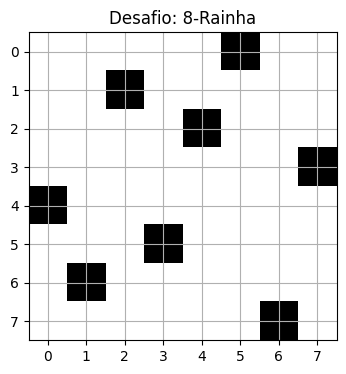

In [3]:
random.seed(42)

ga = eightQueens()

solution_found, evaluations = ga.evolve()

if solution_found:
  print(f"solução encontrada : {ga.best_solution}")
  print(f"penalidade: {ga.calculate_penalty(ga.best_solution)}")
  ga.plot_board(ga.best_solution)
else:
  print(f"solução não encontrada apos {ga.evaluations} avaliacoes")


##executar 30 avaliações independentes com seeds diferentes


'executando seed : 83567106'

solução encontrada apos 106 avaliações
solução encontrada : [4, 7, 3, 8, 2, 5, 1, 6]
penalidade: 0


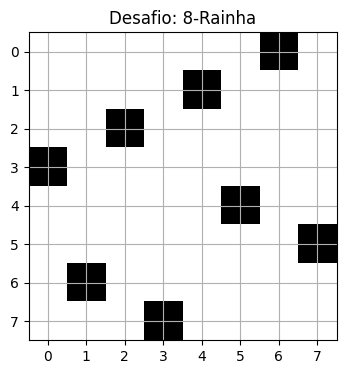

'executando seed : 1518599921'

solução encontrada apos 72 avaliações
solução encontrada : [5, 7, 2, 6, 3, 1, 4, 8]
penalidade: 0


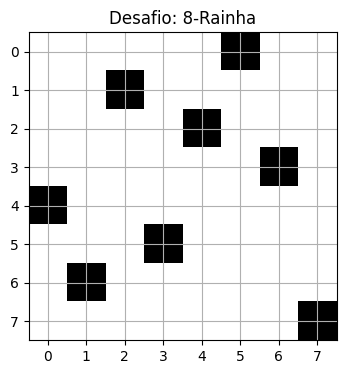

'executando seed : 27514874'

solução encontrada apos 34 avaliações
solução encontrada : [6, 3, 1, 8, 5, 2, 4, 7]
penalidade: 0


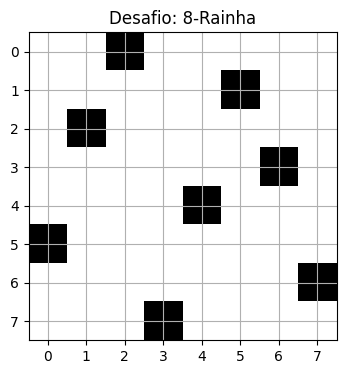

'executando seed : 1568222501'

solução encontrada apos 182 avaliações
solução encontrada : [3, 7, 2, 8, 5, 1, 4, 6]
penalidade: 0


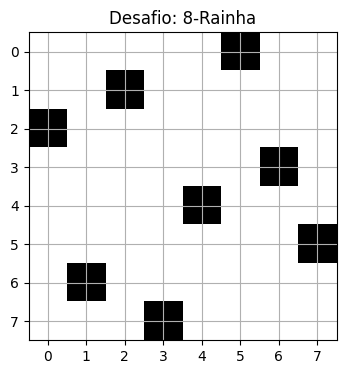

'executando seed : 1334424160'

solução encontrada apos 22 avaliações
solução encontrada : [4, 2, 8, 5, 7, 1, 3, 6]
penalidade: 0


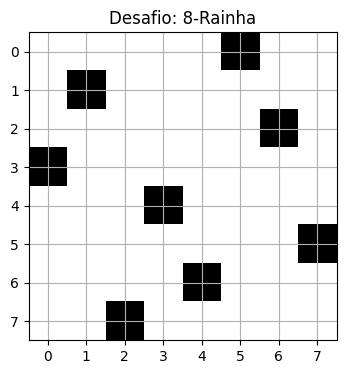

'executando seed : 569965550'

solução encontrada apos 2 avaliações
solução encontrada : [5, 7, 1, 3, 8, 6, 4, 2]
penalidade: 0


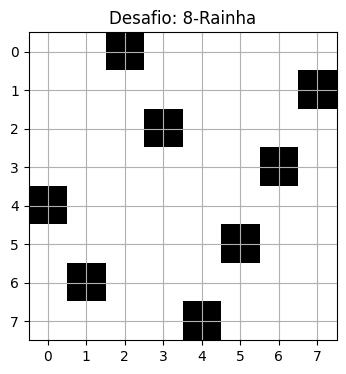

'executando seed : 995149792'

solução encontrada apos 116 avaliações
solução encontrada : [7, 5, 3, 1, 6, 8, 2, 4]
penalidade: 0


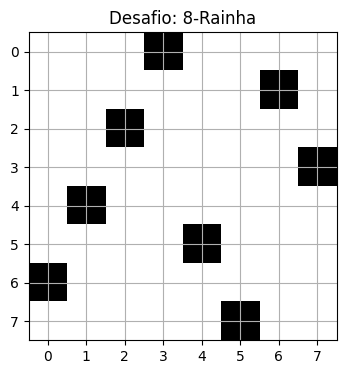

'executando seed : 1264250464'

solução encontrada apos 214 avaliações
solução encontrada : [5, 2, 6, 1, 7, 4, 8, 3]
penalidade: 0


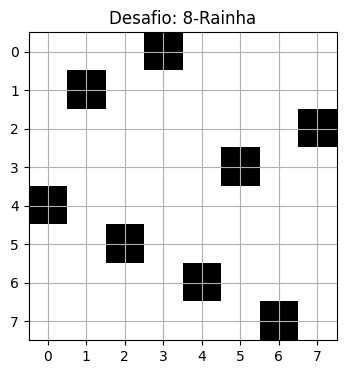

'executando seed : 682189697'

solução encontrada apos 418 avaliações
solução encontrada : [4, 2, 7, 3, 6, 8, 1, 5]
penalidade: 0


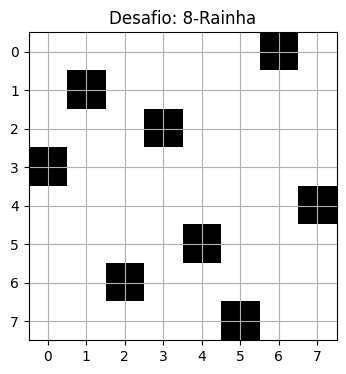

'executando seed : 87937723'

solução encontrada apos 166 avaliações
solução encontrada : [3, 6, 4, 2, 8, 5, 7, 1]
penalidade: 0


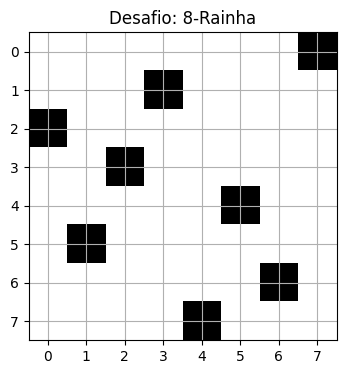

'executando seed : 934128222'

solução encontrada apos 44 avaliações
solução encontrada : [4, 1, 5, 8, 2, 7, 3, 6]
penalidade: 0


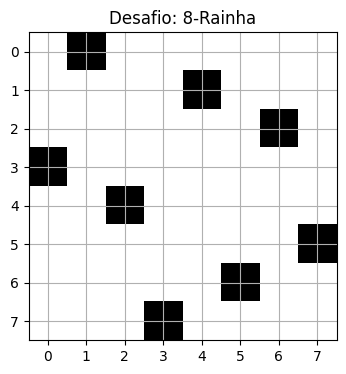

'executando seed : 1747416118'

solução encontrada apos 2 avaliações
solução encontrada : [5, 3, 1, 7, 2, 8, 6, 4]
penalidade: 0


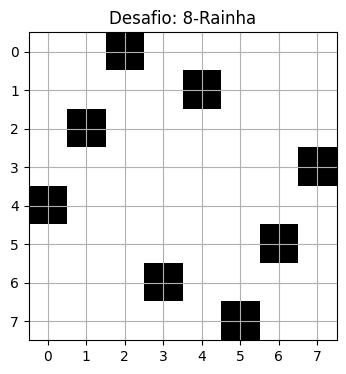

'executando seed : 706767559'

solução encontrada apos 78 avaliações
solução encontrada : [2, 6, 8, 3, 1, 4, 7, 5]
penalidade: 0


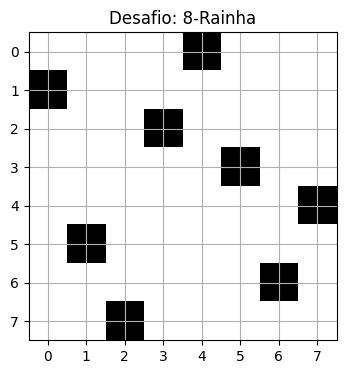

'executando seed : 939250900'

solução encontrada apos 234 avaliações
solução encontrada : [6, 4, 7, 1, 3, 5, 2, 8]
penalidade: 0


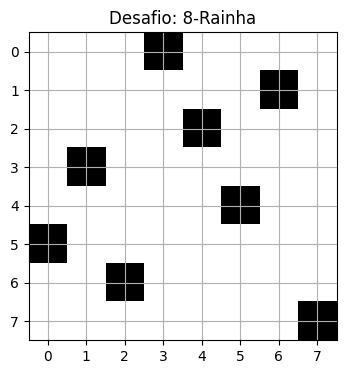

'executando seed : 20203102'

solução encontrada apos 162 avaliações
solução encontrada : [5, 7, 2, 6, 3, 1, 8, 4]
penalidade: 0


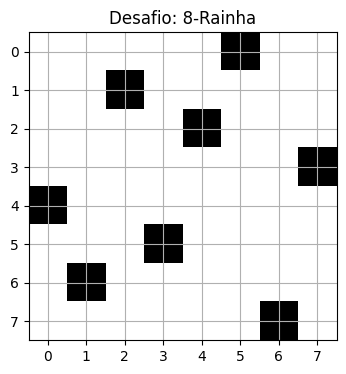

'executando seed : 711196388'

solução encontrada apos 64 avaliações
solução encontrada : [4, 2, 7, 3, 6, 8, 5, 1]
penalidade: 0


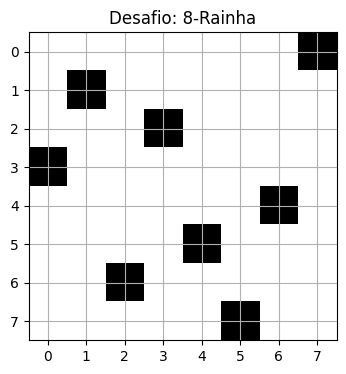

'executando seed : 236371391'

solução encontrada apos 320 avaliações
solução encontrada : [6, 3, 1, 7, 5, 8, 2, 4]
penalidade: 0


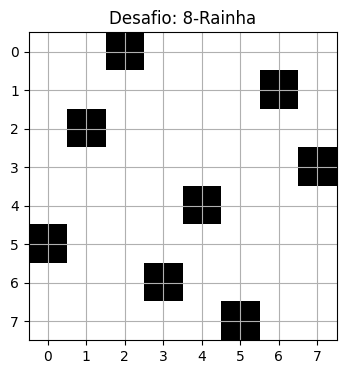

'executando seed : 1307232215'

solução encontrada apos 458 avaliações
solução encontrada : [8, 2, 5, 3, 1, 7, 4, 6]
penalidade: 0


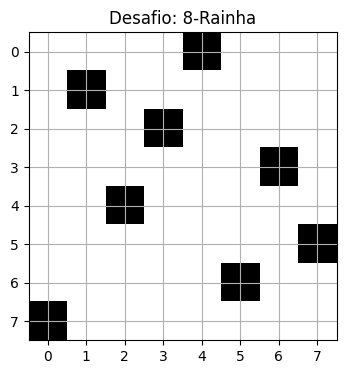

'executando seed : 174965358'

solução encontrada apos 32 avaliações
solução encontrada : [5, 2, 4, 7, 3, 8, 6, 1]
penalidade: 0


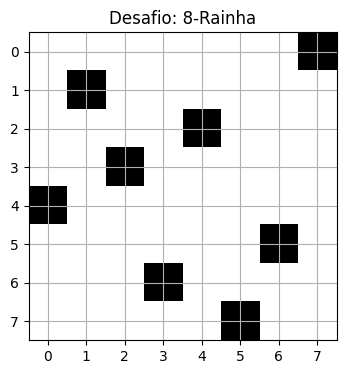

'executando seed : 1226362731'

solução encontrada apos 38 avaliações
solução encontrada : [3, 5, 2, 8, 6, 4, 7, 1]
penalidade: 0


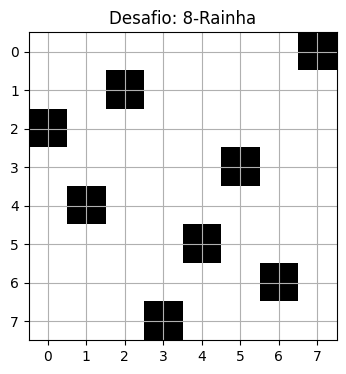

'executando seed : 512071182'

solução encontrada apos 6 avaliações
solução encontrada : [5, 2, 6, 1, 7, 4, 8, 3]
penalidade: 0


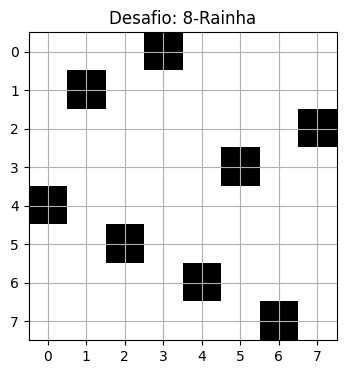

'executando seed : 1184149879'

solução encontrada apos 160 avaliações
solução encontrada : [6, 4, 7, 1, 3, 5, 2, 8]
penalidade: 0


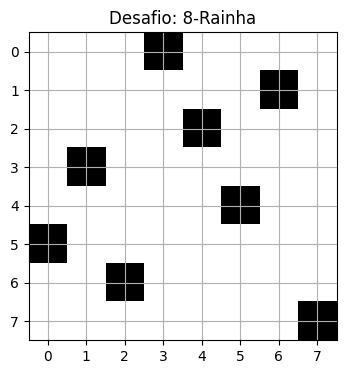

'executando seed : 960347806'

solução encontrada apos 164 avaliações
solução encontrada : [2, 6, 1, 7, 4, 8, 3, 5]
penalidade: 0


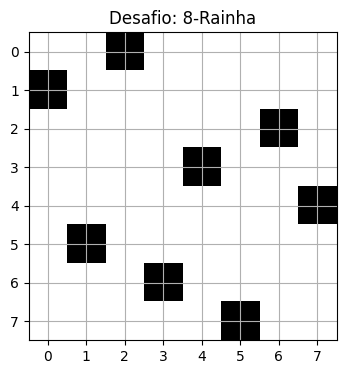

'executando seed : 1102731117'

solução encontrada apos 426 avaliações
solução encontrada : [2, 4, 6, 8, 3, 1, 7, 5]
penalidade: 0


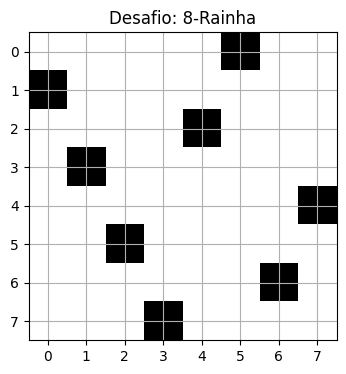

'executando seed : 1228085658'

solução encontrada apos 56 avaliações
solução encontrada : [3, 6, 2, 5, 8, 1, 7, 4]
penalidade: 0


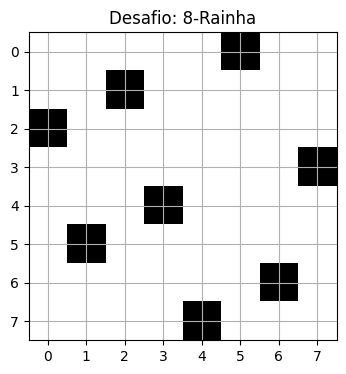

'executando seed : 509396127'

solução encontrada apos 202 avaliações
solução encontrada : [6, 3, 5, 8, 1, 4, 2, 7]
penalidade: 0


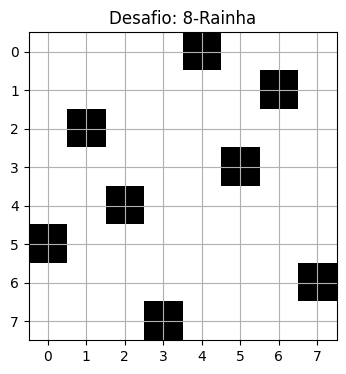

'executando seed : 413900422'

solução encontrada apos 496 avaliações
solução encontrada : [6, 3, 7, 2, 8, 5, 1, 4]
penalidade: 0


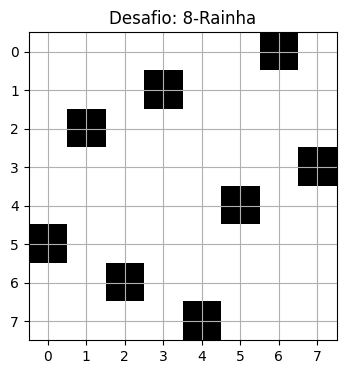

'executando seed : 1541542255'

solução encontrada apos 48 avaliações
solução encontrada : [4, 8, 5, 3, 1, 7, 2, 6]
penalidade: 0


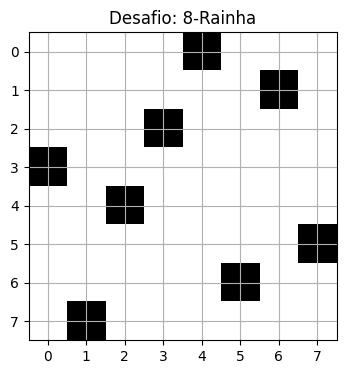

'executando seed : 548531005'

solução encontrada apos 2 avaliações
solução encontrada : [5, 8, 4, 1, 3, 6, 2, 7]
penalidade: 0


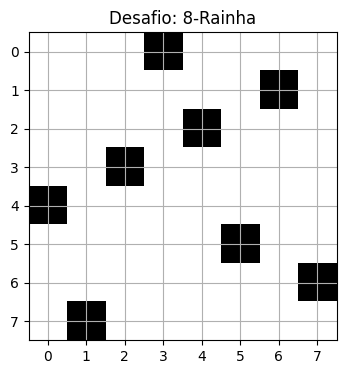

'executando seed : 149010093'

solução encontrada apos 142 avaliações
solução encontrada : [5, 8, 4, 1, 7, 2, 6, 3]
penalidade: 0


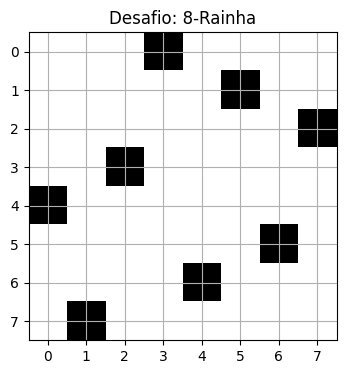

In [12]:
import time

for i in range(30):
  seed = random.randint(0, int(time.time()))
  random.seed(seed)
  display(f"executando seed : {seed}")

  ga = eightQueens()

  solution_found, evaluations = ga.evolve()

  if solution_found:
    print(f"solução encontrada : {ga.best_solution}")
    print(f"penalidade: {ga.calculate_penalty(ga.best_solution)}")
    ga.plot_board(ga.best_solution)
  else:
    print(f"solução não encontrada apos {ga.evaluations} avaliacoes")